## **House Price Prediction**

Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Reading the dataset

In [3]:
df = pd.read_csv("final_df.csv")

Printing 5 rows of the dataset

In [4]:
df.head()

,Unnamed: 0,image_id,street,citi,n_citi,bed,bath,sqft,price,img_f1,img_f2,img_f3,img_f4,img_f5
0,1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500,0.0,0.054457,0.0,0.0,0.167603
1,4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100,0.0,0.496700,0.0,0.0,0.479637
2,6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000,0.0,0.000000,0.0,0.0,0.000000
3,7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,0.0,5.809244,0.0,0.0,1.086153
4,8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,0.0,5.809244,0.0,0.0,1.086153


Dropping Unnamed and Image id columns

In [5]:
df = df.drop(["Unnamed: 0", "image_id"], axis=1)

In [6]:
df.head()

,street,citi,n_citi,bed,bath,sqft,price,img_f1,img_f2,img_f3,img_f4,img_f5
0,124 C Street W,"Brawley, CA",48,3,2.0,713,228500,0.0,0.054457,0.0,0.0,0.167603
1,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100,0.0,0.496700,0.0,0.0,0.479637
2,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000,0.0,0.000000,0.0,0.0,0.000000
3,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,0.0,5.809244,0.0,0.0,1.086153
4,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,0.0,5.809244,0.0,0.0,1.086153


Checking columns name

In [7]:
df.columns

Index(['street', 'citi', 'n_citi', 'bed', 'bath', 'sqft', 'price', 'img_f1',
       'img_f2', 'img_f3', 'img_f4', 'img_f5'],
      dtype='object')

Checking the data types 

In [8]:
df.dtypes

street     object
citi       object
n_citi      int64
bed         int64
bath      float64
sqft        int64
price       int64
img_f1    float64
img_f2    float64
img_f3    float64
img_f4    float64
img_f5    float64
dtype: object

Displaying dataset stats

In [9]:
df.describe()

,n_citi,bed,bath,sqft,price,img_f1,img_f2,img_f3,img_f4,img_f5
count,12518.000000,12518.000000,12518.000000,12518.000000,1.251800e+04,12518.0,12518.000000,12518.0,12518.0,12518.000000
mean,216.511104,3.549369,2.454034,2177.679981,6.853688e+05,0.0,1.249028,0.0,0.0,1.771966
std,113.610683,1.019620,0.963195,1024.045854,3.652546e+05,0.0,0.985993,0.0,0.0,1.446634
min,0.000000,1.000000,0.000000,352.000000,1.950000e+05,0.0,0.000000,0.0,0.0,0.000000
25%,118.000000,3.000000,2.000000,1431.000000,4.350000e+05,0.0,0.704102,0.0,0.0,0.727572
50%,225.000000,3.000000,2.100000,1949.000000,6.199000e+05,0.0,1.090853,0.0,0.0,1.649193
75%,313.000000,4.000000,3.000000,2744.750000,7.999000e+05,0.0,1.505452,0.0,0.0,2.013801
max,414.000000,12.000000,36.000000,17667.000000,2.000000e+06,0.0,8.099455,0.0,0.0,10.457992


Plotting the correlation heatmap

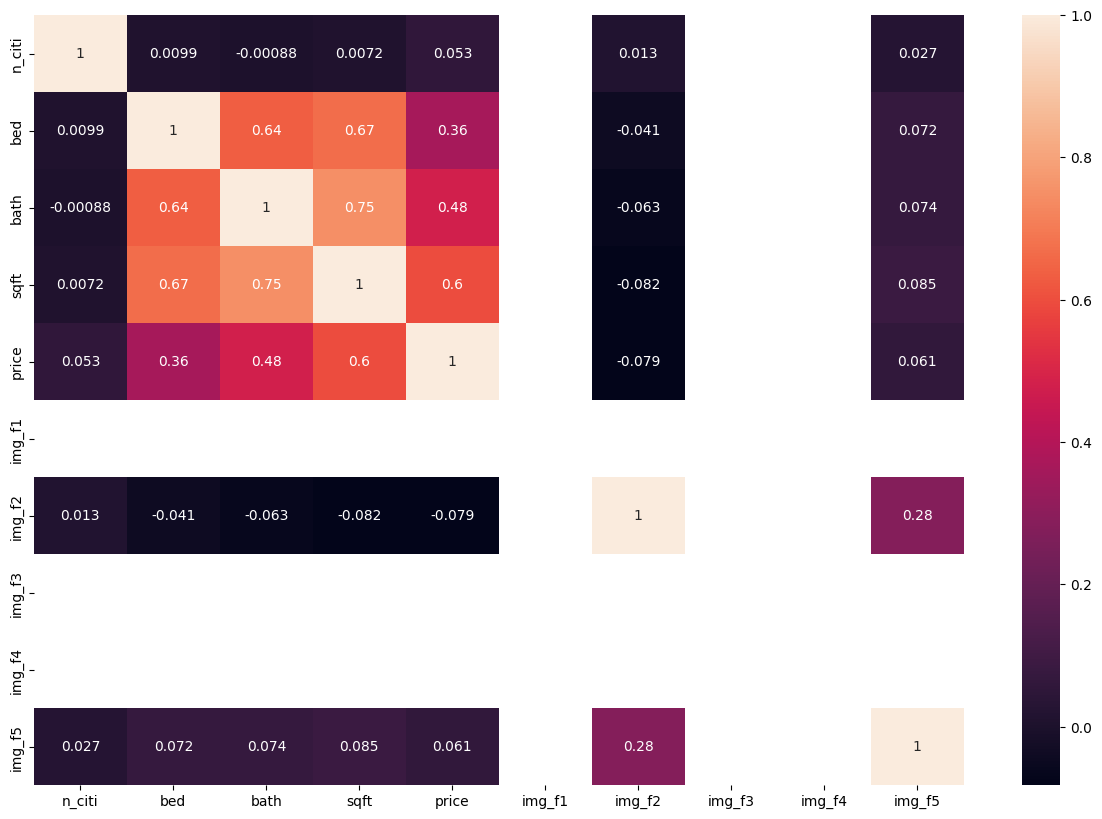

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

Insights :- 

 **•** We can see that the independent features are having good amount of correlation.
 
 **•** Feature img_f1, img_f3 and img_f4 are not correlated with the target feature so we are going to remove those features.

**Removing img_f1, img_f3 and img_f4**

In [11]:
df = df.drop(['img_f1', 'img_f3', 'img_f4'], axis=1)

In [12]:
df.head()

,street,citi,n_citi,bed,bath,sqft,price,img_f2,img_f5
0,124 C Street W,"Brawley, CA",48,3,2.0,713,228500,0.054457,0.167603
1,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100,0.496700,0.479637
2,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000,0.000000,0.000000
3,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,5.809244,1.086153
4,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,5.809244,1.086153


**Plotting the data distributions**

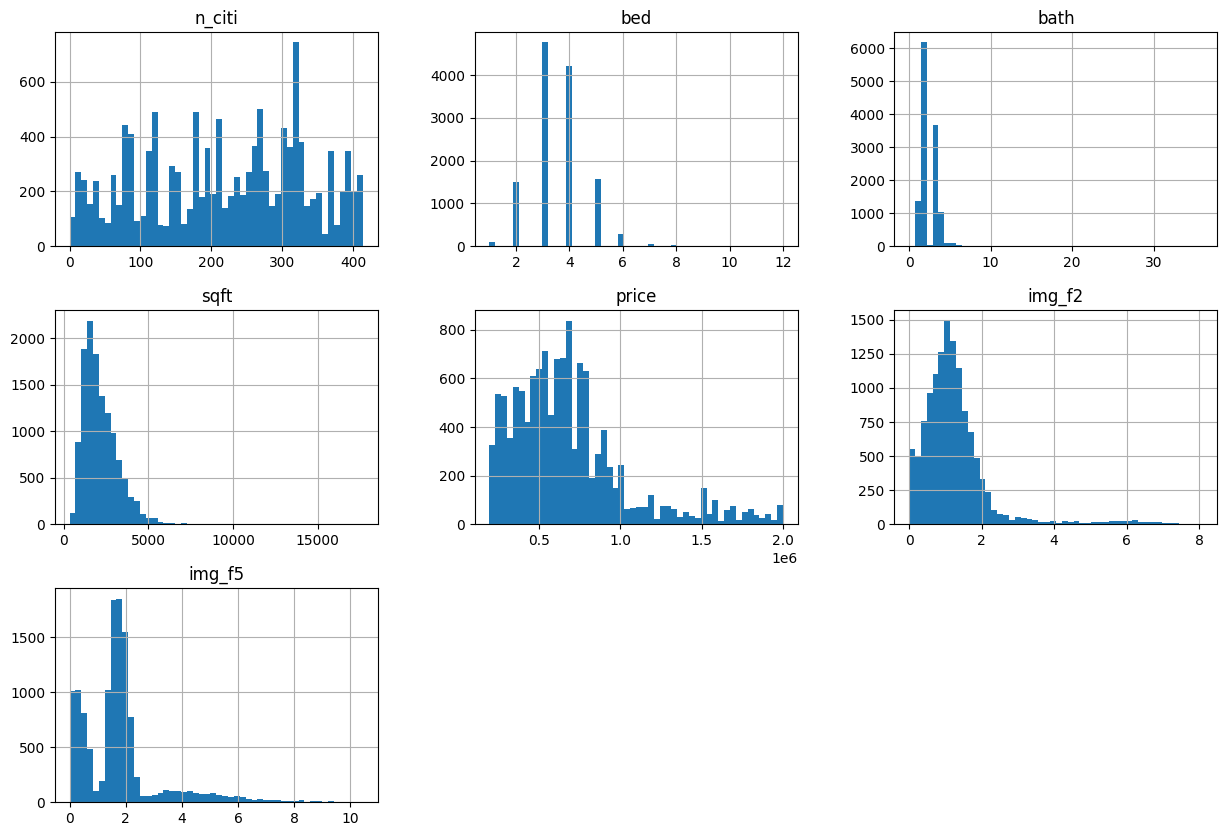

In [13]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Insights :- 

**•**  Most of the continuous features are right skewed i.e sqft, price, img_f2, img_f5.

**•** The price feature has some outliers as we can see from that the distribution.

**•** The n_citi feature has nearly a uniform distribution.


**Displaying the skewness in the dataset**

In [14]:
df.skew(numeric_only=True).sort_values(ascending=True)

n_citi   -0.133421
bed       0.568414
price     1.417599
sqft      1.500091
img_f5    1.964599
img_f2    2.926490
bath      4.313801
dtype: float64

**Plotting the box plot**

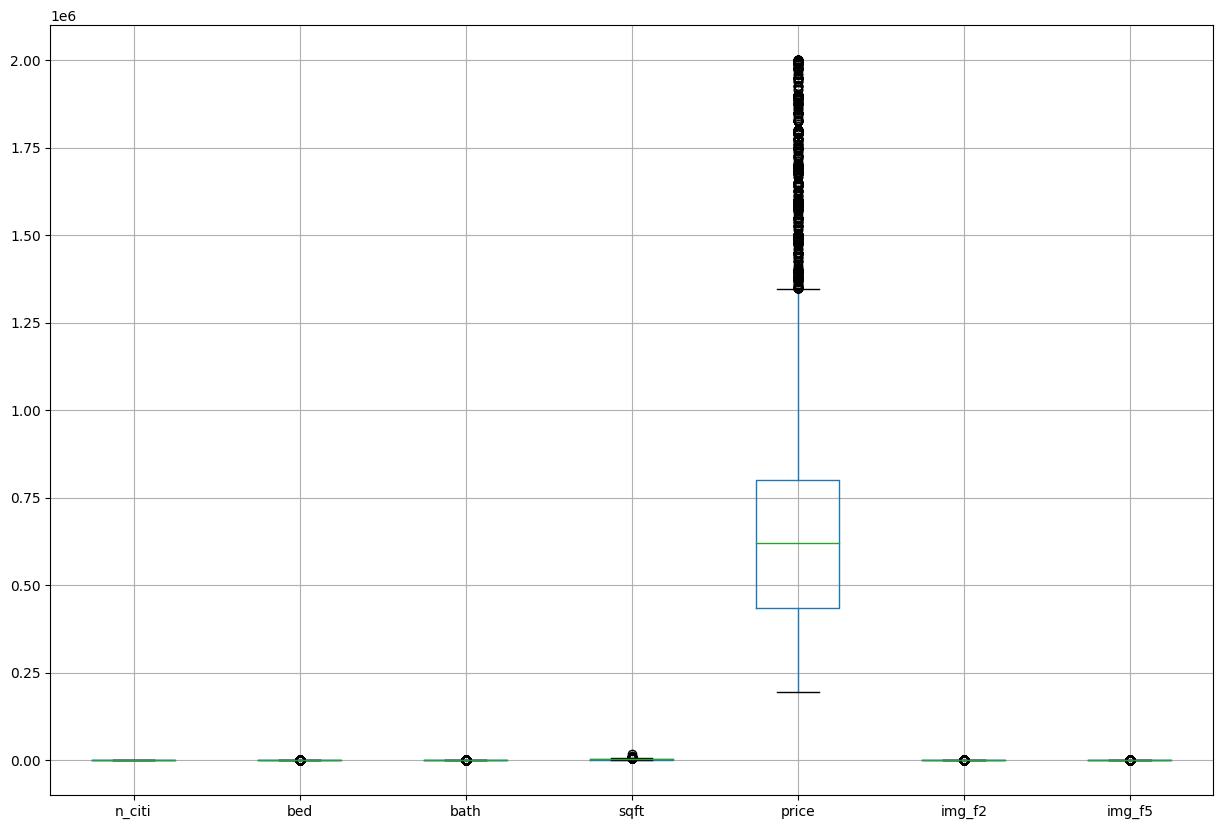

In [15]:
df.boxplot(figsize=(15,10))
plt.show()

Insights :-

**•** As we can see that price feature has significant amount of outliers

**Handling price feature outliers**

In [16]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)

In [17]:
iqr = q3-q1

In [18]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

print(f"upper limit {upper_limit} and lower limit {lower_limit}")

upper limit 1347250.0 and lower limit -112350.0


In [19]:
df[df["price"]>upper_limit]

,street,citi,n_citi,bed,bath,sqft,price,img_f2,img_f5
6,38833 Gorman Post Road,"Gorman, CA",129,3,2.1,4044,1350000,1.485596,2.244711
7,8072 Cuddy Valley Road,"Frazier Park, CA",122,5,5.1,6247,1499000,1.459372,1.851819
8,8072 Cuddy Valley Road,"Frazier Park, CA",122,5,5.1,6247,1499000,1.459372,1.851819
9,11265 Steinhoff Road,"Frazier Park, CA",122,3,3.1,4597,1550000,0.946525,2.051827
10,12471 Boy Scout Camp Road,"Frazier Park, CA",122,8,3.1,4236,1850000,0.739510,2.487626
...,...,...,...,...,...,...,...,...,...
11933,31601 Germaine Lane,"Westlake Village, CA",401,5,6.0,5915,1699000,0.989802,1.956346
11934,1967 Hathaway Avenue,"Westlake Village, CA",401,5,5.1,5718,1825000,2.248679,5.008658
11935,1370 Cuyama Road,"Ojai, CA",257,3,3.0,2490,1500000,0.546435,0.222240
11936,14859 Telegraph Road,"Santa Paula, CA",338,7,5.1,5450,1595000,0.502249,1.632231


In [31]:
new_df = df[df["price"]<upper_limit]
new_df.shape

(11571, 9)

<Axes: >

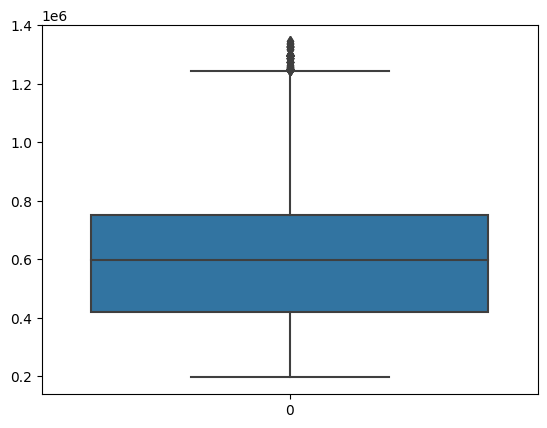

In [21]:
sns.boxplot(data=new_df["price"])

**Adding the img_f2 and img_f5 feature to make new feature**

In [34]:
new_df["img_features"] = new_df["img_f2"] + new_df["img_f5"]

In [35]:
new_df = new_df.drop(["img_f2", "img_f5"], axis=1)

In [24]:
new_df = new_df.reset_index()

In [37]:
new_df.head()

,n_citi,bath,sqft,img_features,price
0,48,2.0,713,0.222060,228500
1,55,3.0,2547,0.976337,385100
2,55,3.0,2769,0.000000,415000
3,48,2.1,2600,6.895397,545000
4,48,2.1,2600,6.895397,545000
